In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
df = pd.read_csv('https://raw.githubusercontent.com/jordanplanders/Thinkful/master/Bootcamp/Unit%203/capstone/AF/global_carbon_budget.csv')

In [10]:
df_hist = pd.read_csv('https://raw.githubusercontent.com/openclimatedata/global-carbon-budget/master/data/historical-budget.csv')

In [117]:
df_mlospo = pd.read_csv('https://raw.githubusercontent.com/jordanplanders/Thinkful/master/Prep%20Course/Unit%202/data/merged_ice_core_yearly2.csv', skiprows=range(1, 28))
df_mlospo.reset_index(level=0, inplace=True)
df_mlospo.columns = ['year', 'CO2_ppm']
df_mlospo.year = -(df_mlospo.year-df_mlospo.year.max()+2)
df_mlospo['CO2_gtc'] = df_mlospo.CO2_ppm/2.12

In [13]:
df.columns = ['year', 'FF', 'LU',
       'atm', 'oc', 'ld', 'residual']

In [14]:
df['AF'] = df.atm/(df.FF + df.LU)

In [118]:
df['FF_2'] = np.concatenate([[0, 0] ,df['FF'][:-2]])
df['FF_1'] = np.concatenate([[0 ] ,df['FF'][:-1]])
df['LU_2'] = np.concatenate([[0, 0] ,df['LU'][:-2]])
df['LU_1'] = np.concatenate([[0 ] ,df['LU'][:-1]])
df['past_emissions'] = df['FF_1']+df['LU_1']
df['atm_1'] = np.concatenate([[0 ] ,df['atm'][:-1]])
df['atm_2'] = np.concatenate([[0,0 ] ,df['atm'][:-2]])
df['CO2_gtc'] = df_mlospo['CO2_gtc']

In [108]:
df['oc'] = -df['oc']
df['ld'] = -df['ld']

In [119]:
X = df.loc[:, ~(df.columns).isin(['atm','AF', 'oc', 'ld', 'FF_1', 'FF_2', 'LU_1', 'LU_2', 'atm_1', 'atm_2', 'past_emissions', 'residual'])]
Y = df['atm']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y)

In [120]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()

In [121]:
lin_reg.fit(X_train, y_train)
y_preds = lin_reg.predict(X_test)
lin_reg.score(X_test, y_test)

0.31801781699347764

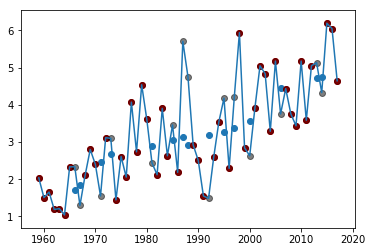

In [122]:
plt.scatter(X_test['year'], y_preds)
plt.scatter(X_train['year'], y_train, c = 'r')
plt.scatter(df['year'], df['atm'], c = 'k', alpha = .5)
plt.plot(df['year'], df['atm'])

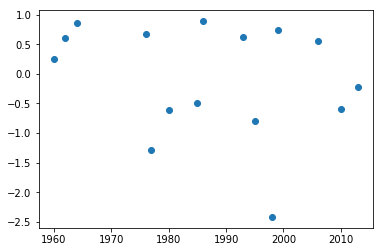

In [90]:
plt.scatter(X_test['year'],y_preds-y_test)

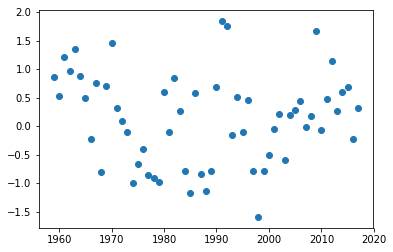

In [103]:
plt.scatter(df['year'],df['residual'])